# Hanna Wierszok

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("/content/sample_data/ha_1.csv")
df

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease
202,Levern Trantow III,35,0,1,138,183,1,182,Disease


In [14]:
data = df[['age', 'chol', 'diagnosis']].copy()
# Converting 'No Disease' to 0 and 'Disease' to 1
data['diagnosis'] = data['diagnosis'].apply(lambda x: 0 if x == 'No Disease' else 1)
# Splitting the data into features (X) and target variable (y)
X = data[['age', 'chol']]
y = data['diagnosis']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Fitting the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)


LogisticRegression()

For a 55-year-old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [15]:
age_55_chol_pred = [[55, 0]]
chol_pred_probability = logreg.predict_proba(age_55_chol_pred)[:, 1]
print(f"For a 55-year-old, the predicted probability of heart disease is: {chol_pred_probability[0]*100:.2f}%")

For a 55-year-old, the predicted probability of heart disease is: 0.00%


How high for the doctors to estimate a 90% chance that heart disease is present?

In [17]:
threshold_probability = 0.9
threshold_chol = logreg.intercept_[0] / logreg.coef_[0][1] - logreg.intercept_[0] / logreg.coef_[0][0] * 55
print(f"For a 90% chance of heart disease, the cholesterol level needs to be: {threshold_chol:.2f}")

For a 90% chance of heart disease, the cholesterol level needs to be: 32.27


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [18]:
data_lda = df[['age', 'chol', 'diagnosis']].copy()
data_lda['diagnosis'] = data_lda['diagnosis'].apply(lambda x: 0 if x == 'No Disease' else 1)
X_lda = data_lda[['age', 'chol']]
y_lda = data_lda['diagnosis']
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y_lda, test_size=0.2, random_state=42)
scaler_lda = StandardScaler()
X_train_scaled_lda = scaler_lda.fit_transform(X_train_lda)
X_test_scaled_lda = scaler_lda.transform(X_test_lda)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled_lda, y_train_lda)


LinearDiscriminantAnalysis()

In [20]:
# Age = 55, Cholesterol needs to be predicted
age_55_chol_pred_lda = [[55, 0]]
lda_pred = lda.predict(age_55_chol_pred_lda)
print(f"For a 55-year-old for the doctors to predict heart disease {'is present' if lda_pred[0] == 1 else 'is not present'}.")


For a 55-year-old for the doctors to predict heart disease is not present.


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [21]:
data_svc = df[['age', 'chol', 'diagnosis']].copy()
data_svc['diagnosis'] = data_svc['diagnosis'].apply(lambda x: 0 if x == 'No Disease' else 1)
X_svc = data_svc[['age', 'chol']]
y_svc = data_svc['diagnosis']
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_svc, y_svc, test_size=0.2, random_state=42)
scaler_svc = StandardScaler()
X_train_scaled_svc = scaler_svc.fit_transform(X_train_svc)
X_test_scaled_svc = scaler_svc.transform(X_test_svc)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
svc = SVC(probability=True)
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled_svc, y_train_svc)
best_C = grid_search.best_params_['C']
svc_best = SVC(C=best_C, probability=True)
svc_best.fit(X_train_scaled_svc, y_train_svc)


SVC(C=1, probability=True)

In [22]:
# Age = 55, Cholesterol needs to be predicted
age_55_chol_pred_svc = [[55, 0]]
svc_pred_proba = svc_best.predict_proba(age_55_chol_pred_svc)[:, 1]

print(f"For a 55-year-old, the predicted probability of heart disease is: {svc_pred_proba[0]*100:.2f}%")


For a 55-year-old, the predicted probability of heart disease is: 59.84%


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

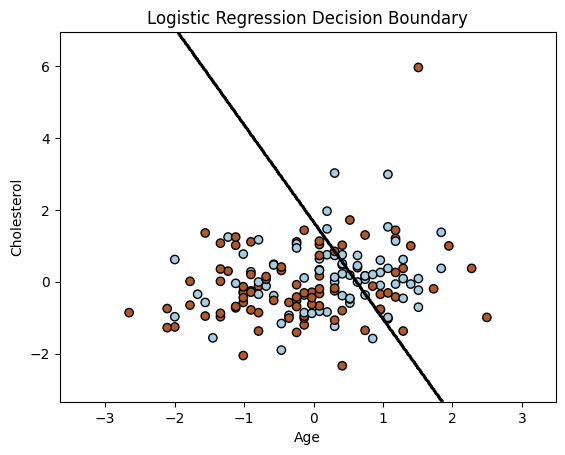

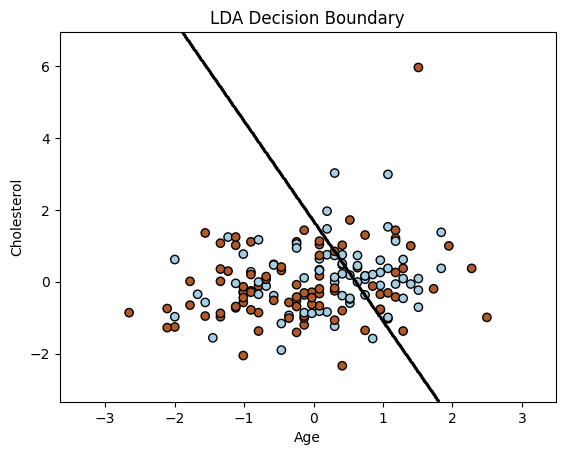

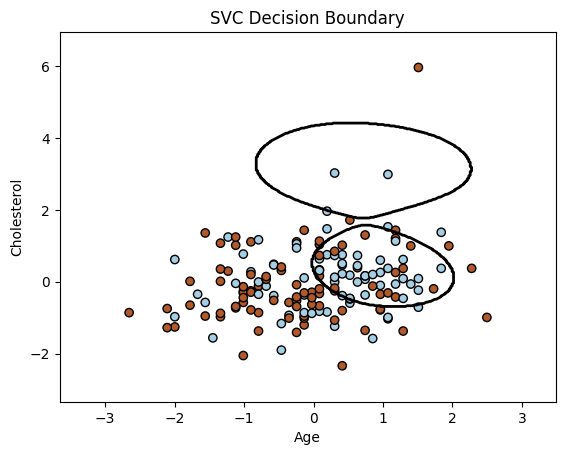

In [23]:
import matplotlib.pyplot as plt
import numpy as np
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Age')
    plt.ylabel('Cholesterol')
    plt.title(title)
    plt.show()
plot_decision_boundary(logreg, X_train_scaled, y_train, 'Logistic Regression Decision Boundary')
plot_decision_boundary(lda, X_train_scaled_lda, y_train_lda, 'LDA Decision Boundary')
plot_decision_boundary(svc_best, X_train_scaled_svc, y_train_svc, 'SVC Decision Boundary')
